<a href="https://colab.research.google.com/github/Tanveer132/Dimensionality-Reduction-Techniques-in-ML/blob/main/FST_Practice_PCA_Application(Feature_Extraction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Application of PCA (Feature Extraction)

##import data, clean data, encode data, scale data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv('/content/glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
x=df.drop(columns=['Type'])
y=df['Type']

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [5]:
sc=StandardScaler()
sc_xtrain=sc.fit_transform(xtrain)
sc_xtest=sc.fit_transform(xtest)

##Fit PCA to get explained  variance ratio and its cumulative sum



In [6]:
#fit pca in train data and get variance ratio
pca=PCA()
pca.fit(sc_xtrain)
pca.explained_variance_ratio_

array([2.97953561e-01, 2.06577739e-01, 1.57093544e-01, 1.33576784e-01,
       1.00646739e-01, 5.51996719e-02, 4.09963275e-02, 7.75573030e-03,
       1.99903424e-04])

In [7]:
val=np.cumsum(pca.explained_variance_ratio_)*100
val

array([ 29.79535612,  50.45312998,  66.16248442,  79.52016279,
        89.58483669,  95.10480388,  99.20443663,  99.98000966,
       100.        ])

##Elbow plot for variance and dimensions

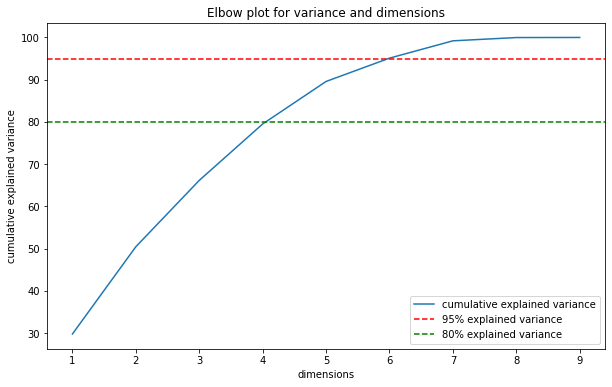

In [8]:
plt.figure(figsize=(10,6))
plt.plot(range(1,len(val)+1),val,label="cumulative explained variance")
plt.axhline(y=95,color="r",linestyle="--",label="95% explained variance")
plt.axhline(y=80,color="g",linestyle="--",label="80% explained variance")
plt.title("Elbow plot for variance and dimensions")
plt.xlabel("dimensions")
plt.ylabel("cumulative explained variance")
plt.legend()

##Check the plot where crosses dimensions

In [9]:
# fit pca on train dataset and transform both train and test
pca=PCA(n_components=0.95)
pca.fit(sc_xtrain)
pca_xtrain=pca.transform(sc_xtrain)
# pca_xtest=pca.transform(sc_xtest)

In [10]:
pca.n_components_

6